Author: Diwash Dhakal
Created: 02/05/2021
Title: shift_angle_cm

# This Notebook reads in data files from a given directory and aligns them wrt the center of mass of k-beta peak 
output are the shifted data files in .txt format

In [1]:
import numpy as np
import os
import functions_cm as f
import matplotlib.pyplot as plt
%matplotlib notebook

read in reference file and make lists from the columns: energy_ref = energy & data_ref = counts per live

In [2]:
energy_ref, data_ref = f.read_file()

convert the energy values to angle values using Bragg's law

In [3]:
# args - a list of energy values and a float 'd' (interlayer distance); d  for Ge 555 is 0.0653269 nm
angle_ref = f.convert_to_angle(energy_ref, 0.0653269)  

#convert the lists to arrays  
angle_ref = np.array(angle_ref, dtype=float)
data_ref = np.array(data_ref, dtype=float)

Read in data files from specified directory

In [4]:
# can also make a list of directories for more than one sample as a future mod
directory = 'Averaged & Normalized'
path_directory = 'C:\\Users\\sawid\\Research\\Temperature-dependent-vtc\\data-processing\\rattrap_dataprocess\\Averaged & Normalized'


In [5]:
# checks that the directory exists and throws error if not
assert os.path.exists(f'{path_directory}'), f'No directory with the name {directory} in specified path'

In [6]:
# generates a list of all the data files in specified directory
file_list = [f for f in os.listdir(path_directory) if 'norm' in f]
N = len(file_list)
print(N)
#print(file_list)

35


In [7]:
# Data will be a 3D list that will be [batch number, row, column]
# where the rows and columns are the same from data files
Data = []
# Headers will list which column corresponds to which property, i.e. energy or counts per live
Headers = []

# read in every data file
for filename in file_list:
    Data.append(np.array(f.read_data_file(f'{path_directory}/{filename}'))) 

# convert list to array
Data = np.array(Data, dtype=float)

create a list of indices to choose specific data set from the Data array

In [8]:
file_index = []
for i in range(len(Data[:])):
    file_index.append(i)
    
print(file_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


The spectra_shift() function aligns the spectra wrt the center of mass of the kbeta peak. 

The function output:  shows a plot of all aligned spectra and writes the shifted data in separate txt files with filename: originalfilename_shifted, in a separate folder 'Shifted Data'

<IPython.core.display.Javascript object>


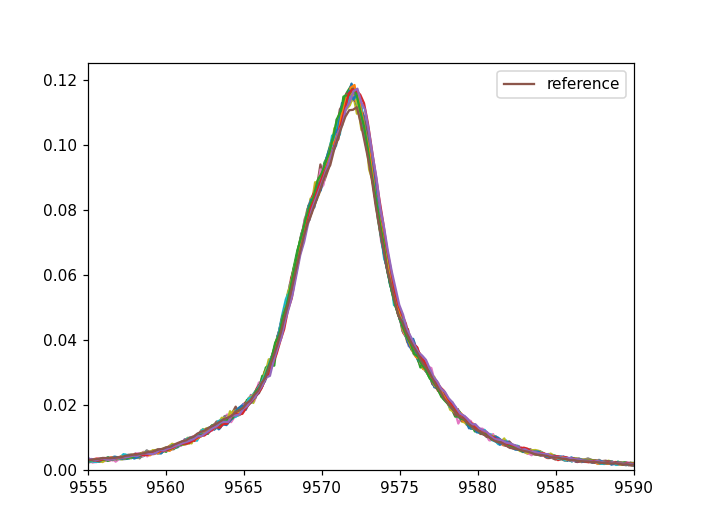

In [9]:
#For each data set (sample), shift the spectra to match the reference data.
for i in file_index:
    # energy is first column
    energy = Data[i,:,0]
    #convert the energy to angle
    angle = f.convert_to_angle(energy, 0.0653269)
    #counts per live (normalized data) is the 2nd column
    data = Data[i,:,1]
    #align the spectra
    f.spectra_shift(angle, data, angle_ref, data_ref,  file_list[i])
    
plt.plot(energy_ref, data_ref, label = 'reference')
plt.legend()